In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

general = pd.read_csv("C:/Users/hwenn/ai-healthcare/general_ema.csv")

In [28]:
# Convert 'date' column to datetime
general['date'] = pd.to_datetime(general['date'], format='%Y%m%d')
date_split = pd.to_datetime("2020-03-11")

general = general.dropna(subset=general.columns[2:19], how='all')

general_stats = general.groupby('date')['current_stress_level'].agg(['mean', 'std']).reset_index()

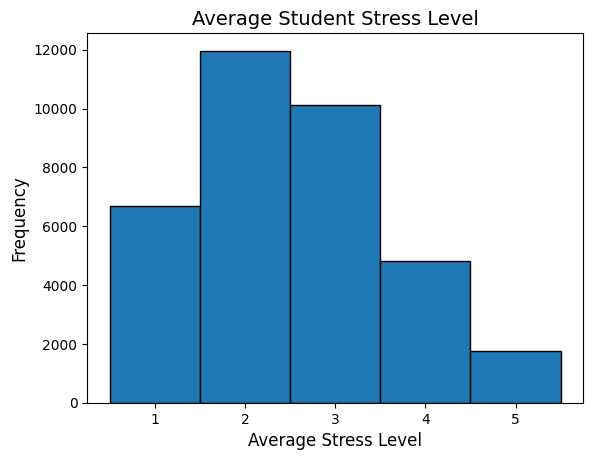

In [12]:
# Plot the histogram with 5 bins for values from 1 to 5
plt.hist(general['current_stress_level'], bins=[1, 2, 3, 4, 5, 6], edgecolor='black', align='left')
plt.title("Average Student Stress Level", fontsize=14)
plt.xlabel("Average Stress Level", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks([1, 2, 3, 4, 5])  # Set x-axis ticks to match the 1-5 range
plt.show()

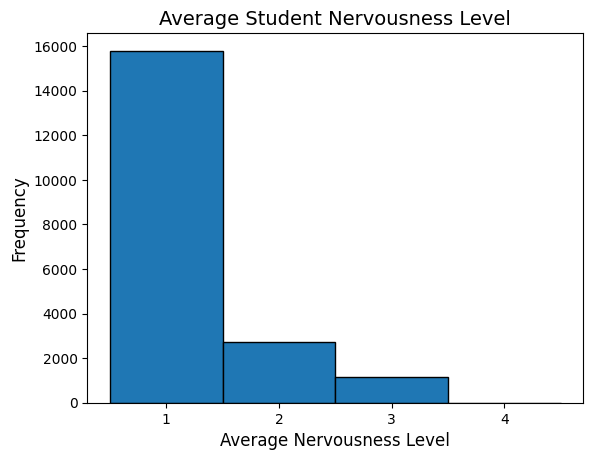

In [13]:
nervous_stats = general.groupby('date')['phq4_feeling_nervous'].agg(['mean', 'std']).reset_index()
plt.hist(general['phq4_feeling_nervous'], bins=[1, 2, 3, 4, 5], edgecolor='black', align='left')
plt.title("Average Student Nervousness Level", fontsize=14)
plt.xlabel("Average Nervousness Level", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks([1, 2, 3, 4])  # Set x-axis ticks to match the 1-4 range
plt.show()

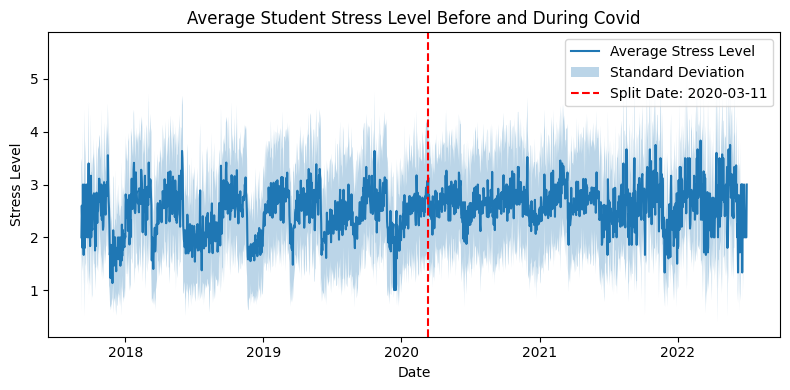

In [25]:
# Step 2: Plot the line plot with standard deviation shading
plt.figure(figsize=(8, 4))

# Line plot of mean sleep duration
plt.plot(general_stats['date'], general_stats['mean'], label="Average Stress Level")

# Shaded area for standard deviation
plt.fill_between(
    general_stats['date'],
    general_stats['mean'] - general_stats['std'],
    general_stats['mean'] + general_stats['std'],
    alpha=0.3,
    label="Standard Deviation"
)

plt.axvline(date_split, color='red', linestyle='--', linewidth=1.5, label="Split Date: 2020-03-11")

# Labels and legend
plt.title("Average Student Stress Level Before and During Covid")
plt.xlabel("Date")
plt.ylabel("Stress Level")
plt.legend()

plt.tight_layout()
plt.show()

In [29]:
# Create a dictionary with the last days of classes for each year
last_days = {
    2017: ['2017-08-23', '2017-11-14'],
    2018: ['2018-03-06', '2018-05-30', '2018-08-22', '2018-11-13'],
    2019: ['2019-03-06', '2019-08-21', '2019-11-22'],
    2020: ['2020-03-06', '2020-06-03', '2020-08-26', '2020-11-17'],
    2021: ['2021-03-10', '2021-06-02', '2021-08-25', '2021-11-16'],
    2022: ['2022-03-08', '2022-06-01', '2022-08-24', '2022-11-15']
}

# Flatten the dictionary into a DataFrame for easier comparison
last_day_df = pd.DataFrame([
    {'last_day': pd.to_datetime(date)} for year, dates in last_days.items() for date in dates
])

# Function to find the nearest last day of classes
def find_next_last_day(row_date):
    # Filter for last days of classes after the current date
    future_dates = last_day_df[last_day_df['last_day'] >= row_date]
    return future_dates['last_day'].min()  # Return the earliest future date

# Assume 'general' has a column 'date' in datetime format
general_stats['last_day_of_classes'] = general_stats['date'].apply(find_next_last_day)

# Calculate days until the last day of classes
general_stats['days_until_last_class'] = (general_stats['last_day_of_classes'] - general_stats['date']).dt.days

# Display the updated DataFrame
print(general_stats.head())


        date  mean       std last_day_of_classes  days_until_last_class
0 2017-09-07   2.0  1.414214          2017-11-14                     68
1 2017-09-08   2.6  0.894427          2017-11-14                     67
2 2017-09-09   2.3  0.823273          2017-11-14                     66
3 2017-09-10   1.8  0.447214          2017-11-14                     65
4 2017-09-11   3.0  1.000000          2017-11-14                     64


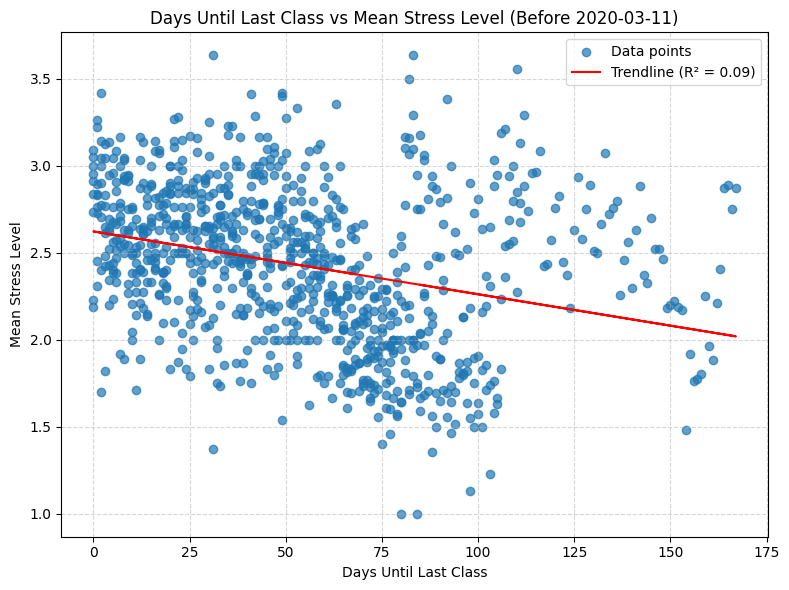

In [36]:
filtered_data = general_stats[general_stats['date'] < date_split]

x = filtered_data['days_until_last_class']
y = filtered_data['mean']

# Fit a linear regression model using numpy
coefficients = np.polyfit(x, y, 1)  # Linear regression (degree 1)
trendline = np.poly1d(coefficients)

# Calculate R-squared
y_pred = trendline(x)
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7, label="Data points")

# Add the trendline
plt.plot(x, trendline(x), color='red', label=f"Trendline (R² = {r_squared:.2f})")

# Add labels and title
plt.title("Days Until Last Class vs Mean Stress Level (Before 2020-03-11)")
plt.xlabel("Days Until Last Class")
plt.ylabel("Mean Stress Level")

# Add legend
plt.legend()

# Optional: Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

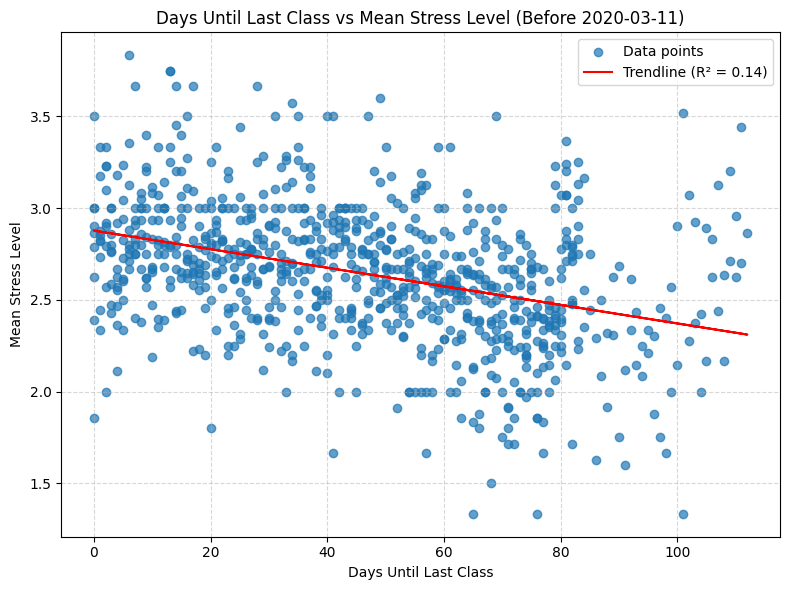

In [37]:
filtered_data = general_stats[general_stats['date'] > date_split]

x = filtered_data['days_until_last_class']
y = filtered_data['mean']

# Fit a linear regression model using numpy
coefficients = np.polyfit(x, y, 1)  # Linear regression (degree 1)
trendline = np.poly1d(coefficients)

# Calculate R-squared
y_pred = trendline(x)
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7, label="Data points")

# Add the trendline
plt.plot(x, trendline(x), color='red', label=f"Trendline (R² = {r_squared:.2f})")

# Add labels and title
plt.title("Days Until Last Class vs Mean Stress Level (Before 2020-03-11)")
plt.xlabel("Days Until Last Class")
plt.ylabel("Mean Stress Level")

# Add legend
plt.legend()

# Optional: Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

In [49]:
# Define the date ranges
date_ranges = [
    ("2017-09-11", "2017-11-22"),
    ("2018-01-03", "2018-03-13"),
    ("2018-03-26", "2018-06-05"),
    ("2018-09-12", "2018-11-21"),
    ("2019-01-03", "2019-03-13"),
    ("2019-03-25", "2019-06-24"),
    ("2019-09-16", "2019-11-27"),
    ("2020-01-06", "2020-03-13"),
    ("2020-03-30", "2020-06-09"),
    ("2020-09-14", "2020-12-04"),
    ("2021-01-07", "2021-03-17"),
    ("2021-03-29", "2021-06-08"),
    ("2021-09-13", "2021-11-24"),
    ("2022-01-04", "2022-03-15"),
    ("2022-03-28", "2022-06-07"),
    ("2022-09-12", "2022-11-23")
]

date_ranges = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in date_ranges]

# Function to check if a date is within any of the specified date ranges
def is_break(date):
    return not any(start <= date <= end for start, end in date_ranges)

# Add the "is_break" column to the general DataFrame
general['is_break'] = general['date'].apply(is_break)

print(general["is_break"])